# **ML IPYNB FILE **

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


# **PAKAGES REQUIRED **

In [1]:
!pip install -U tensorflow keras


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 35.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 44.0 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.0
    Uninstalling tensorboard-2.17.0:
      Successfully uninstalled tensorboard-2.17.0
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.17.0
    Uninstalling tensorflow-2.17.0:
      Successfully uninstalled tensorflow-2.17.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.17.0 requires tensorflow<2.18,>=2.17, but you have tensorflow 2.18.0 which is incompat

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.applications.densenet import DenseNet121
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model
from keras import backend as K
from google.colab import drive
from keras.models import load_model
from glob import glob
from PIL import Image
from tensorflow.keras.applications import DenseNet121
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report



## INSTALL DATASET

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ashery/chexpert")

print("Path to dataset files:", path)

100%|██████████| 10.7G/10.7G [02:30<00:00, 76.4MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/ashery/chexpert/versions/1


**AVALABLE** **DIRECTORIES**

In [4]:
import os

# Check contents of the downloaded dataset directory
print("Contents of downloaded dataset:", os.listdir(path))


Contents of downloaded dataset: ['train', 'valid', 'valid.csv', 'train.csv']


In [5]:
import pandas as pd
train_df = pd.read_csv(os.path.join(path, 'train.csv'))
test_df = pd.read_csv(os.path.join(path, 'valid.csv'))

*INFO OF* *DATASET*

In [6]:
import pandas as pd



# Get the number of rows and columns for both datasets
print("Train DataFrame - Rows and Columns:", train_df.shape)
print("Valid DataFrame - Rows and Columns:", test_df.shape)

# Get basic information about the columns
print("\nTrain DataFrame Info:")
print(train_df.info())

print("\nValid DataFrame Info:")
print(test_df.info())

# Get summary statistics (only for numeric columns)
print("\nTrain DataFrame Summary Statistics:")
print(train_df.describe())

print("\nValid DataFrame Summary Statistics:")
print(test_df.describe())


Train DataFrame - Rows and Columns: (223414, 19)
Valid DataFrame - Rows and Columns: (234, 19)

Train DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223414 entries, 0 to 223413
Data columns (total 19 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Path                        223414 non-null  object 
 1   Sex                         223414 non-null  object 
 2   Age                         223414 non-null  int64  
 3   Frontal/Lateral             223414 non-null  object 
 4   AP/PA                       191027 non-null  object 
 5   No Finding                  22381 non-null   float64
 6   Enlarged Cardiomediastinum  44839 non-null   float64
 7   Cardiomegaly                46203 non-null   float64
 8   Lung Opacity                117778 non-null  float64
 9   Lung Lesion                 11944 non-null   float64
 10  Edema                       85956 non-null   float64
 11  Consolidatio

**DATA** **PRESENT**

In [7]:


train_df.head()

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
0,CheXpert-v1.0-small/train/patient00001/study1/...,Female,68,Frontal,AP,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0
1,CheXpert-v1.0-small/train/patient00002/study2/...,Female,87,Frontal,AP,NaN,NaN,-1.0,1.0,NaN,-1.0,-1.0,NaN,-1.0,NaN,-1.0,NaN,1.0,NaN
2,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Frontal,AP,NaN,NaN,NaN,1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
3,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Lateral,NaN,NaN,NaN,NaN,1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
4,CheXpert-v1.0-small/train/patient00003/study1/...,Male,41,Frontal,AP,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


 **DATA UNDERTANDING**

In [8]:
import glob

# Define the path to include 'train' within the specified KaggleHub directory
image_path = '/root/.cache/kagglehub/datasets/ashery/chexpert/versions/1/train/patient*/study*/*.jpg'

# Use glob to search for all .jpg files in the specified path
my_glob = glob.glob(image_path)

# Count and display the number of observations
print('Number of Observations: ', len(my_glob))


Number of Observations:  223414


In [9]:
print('Number of Observations: ', len(my_glob))

Number of Observations:  223414


In [10]:
train_df.shape

(223414, 19)

In [11]:
train_df['Path'][0]

'CheXpert-v1.0-small/train/patient00001/study1/view1_frontal.jpg'

In [12]:
# Replace part of the string in the 'time' column if it is a string (object type)
train_df['full_path'] = train_df['Path'].apply(lambda x: x.replace('CheXpert-v1.0-small', '/root/.cache/kagglehub/datasets/ashery/chexpert/versions/1') if isinstance(x, str) else x)


In [13]:
train_df.head()

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices,full_path
0,CheXpert-v1.0-small/train/patient00001/study1/...,Female,68,Frontal,AP,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0,/root/.cache/kagglehub/datasets/ashery/chexper...
1,CheXpert-v1.0-small/train/patient00002/study2/...,Female,87,Frontal,AP,NaN,NaN,-1.0,1.0,NaN,-1.0,-1.0,NaN,-1.0,NaN,-1.0,NaN,1.0,NaN,/root/.cache/kagglehub/datasets/ashery/chexper...
2,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Frontal,AP,NaN,NaN,NaN,1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,/root/.cache/kagglehub/datasets/ashery/chexper...
3,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Lateral,NaN,NaN,NaN,NaN,1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,/root/.cache/kagglehub/datasets/ashery/chexper...
4,CheXpert-v1.0-small/train/patient00003/study1/...,Male,41,Frontal,AP,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,/root/.cache/kagglehub/datasets/ashery/chexper...


In [14]:
import glob

# Define the path to include 'valid' within the specified KaggleHub directory
valid_image_path = '/root/.cache/kagglehub/datasets/ashery/chexpert/versions/1/valid/patient*/study*/*.jpg'

# Use glob to search for all .jpg files in the specified path
my_glob_valid = glob.glob(valid_image_path)

# Count and display the number of observations
print('Number of Observations in valid: ', len(my_glob_valid))


Number of Observations in valid:  234


**PATH CHANGING FOR FILES EXTRACTION**

In [15]:

test_df['full_path'] =  test_df['Path'].apply(lambda x: x.replace('CheXpert-v1.0-small', '/root/.cache/kagglehub/datasets/ashery/chexpert/versions/1') if isinstance(x, str) else x)
test_df.head()

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices,full_path
0,CheXpert-v1.0-small/valid/patient64541/study1/...,Male,73,Frontal,AP,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,/root/.cache/kagglehub/datasets/ashery/chexper...
1,CheXpert-v1.0-small/valid/patient64542/study1/...,Male,70,Frontal,PA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,/root/.cache/kagglehub/datasets/ashery/chexper...
2,CheXpert-v1.0-small/valid/patient64542/study1/...,Male,70,Lateral,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,/root/.cache/kagglehub/datasets/ashery/chexper...
3,CheXpert-v1.0-small/valid/patient64543/study1/...,Male,85,Frontal,AP,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,/root/.cache/kagglehub/datasets/ashery/chexper...
4,CheXpert-v1.0-small/valid/patient64544/study1/...,Female,42,Frontal,AP,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,/root/.cache/kagglehub/datasets/ashery/chexper...


# DATA VISUVALIZATION

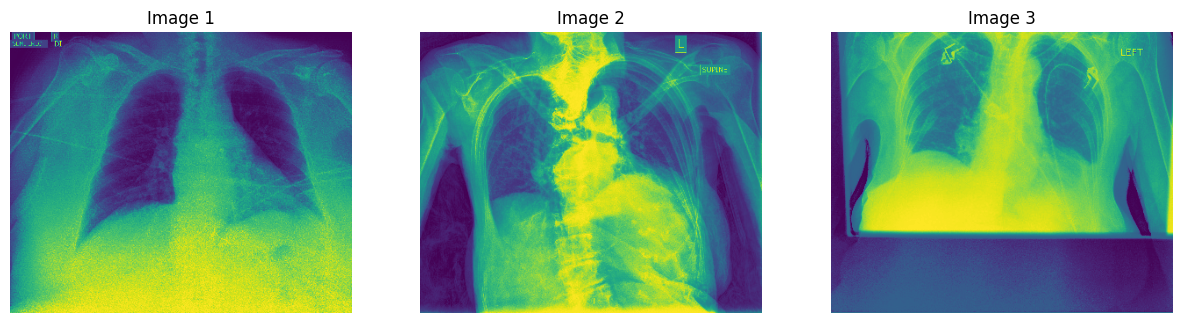

In [17]:
from PIL import Image
import matplotlib.pyplot as plt

# Assuming 'full_path' is the column in train_df that contains the paths to the images
image_paths = train_df['full_path'].head(3)  # Get the first 3 image paths

# Display each image
plt.figure(figsize=(15, 5))  # Adjust figure size to fit three images side-by-side

for i, path in enumerate(image_paths, 1):
    img = Image.open(path)
    plt.subplot(1, 3, i)  # Create a subplot for each image
    plt.imshow(img)
    plt.axis('off')  # Hide axes for a cleaner look
    plt.title(f"Image {i}")

plt.show()


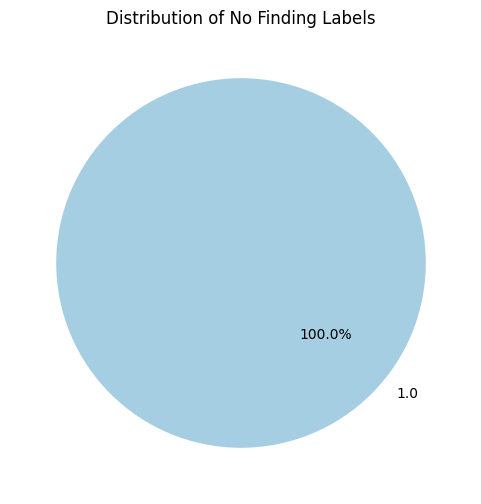

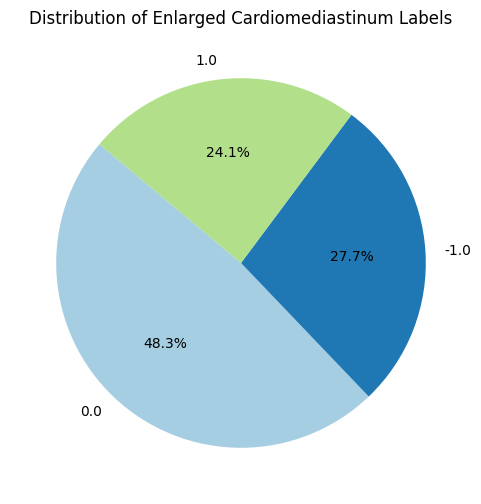

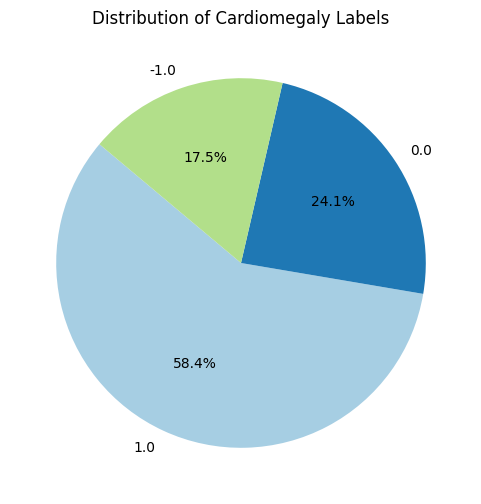

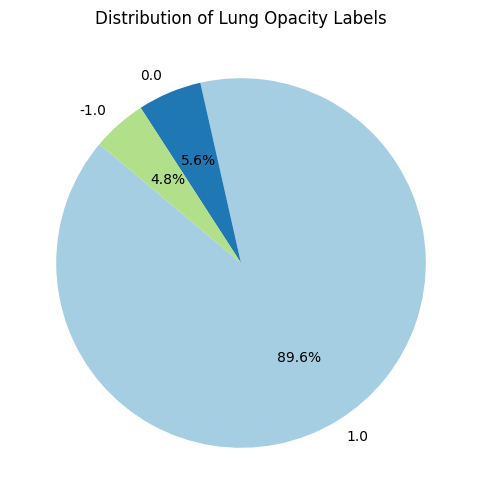

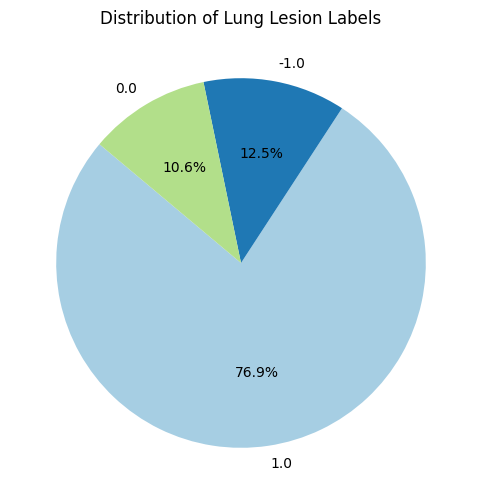

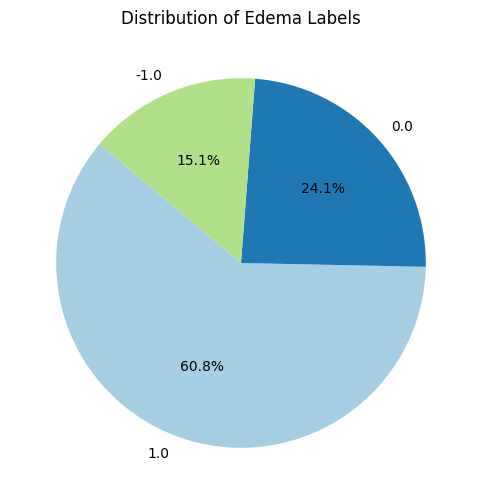

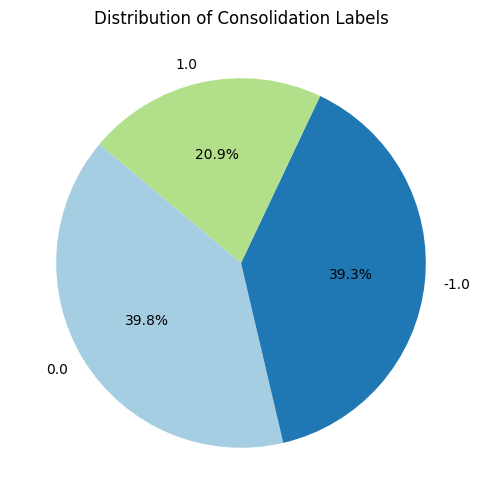

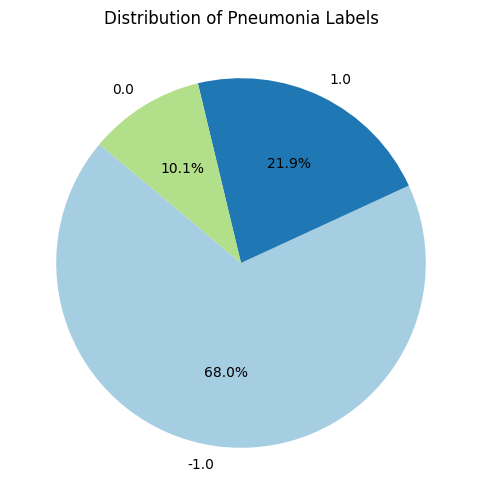

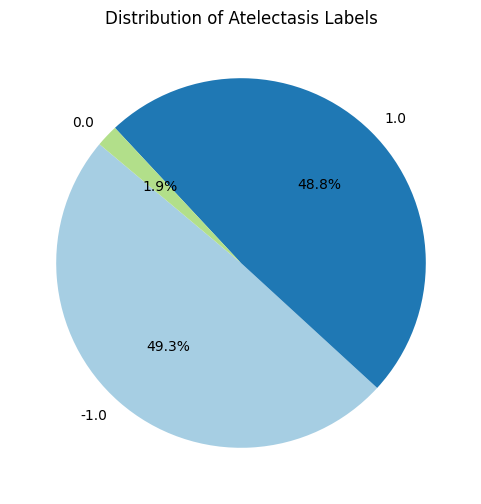

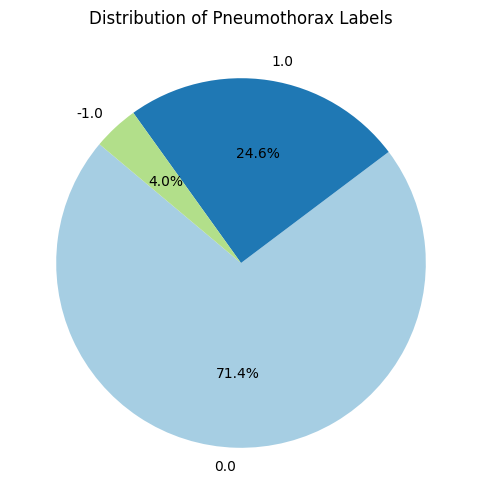

In [16]:
import matplotlib.pyplot as plt

# Select columns from 5 to 15 (adjusting for Python's 0-indexing, column 5 is index 4)
disease_columns = train_df.iloc[:, 5:15]

# Loop through each column and plot a pie chart
for col in disease_columns.columns:
    data = train_df[col].value_counts()  # Count occurrences of each label (0 and 1 for binary classification)

    plt.figure(figsize=(6, 6))  # Set figure size for each pie chart
    plt.pie(data, labels=data.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
    plt.title(f"Distribution of {col} Labels")
    plt.show()


             Disease      1s     0s    -1s   Total
0        Atelectasis   33376   1328  33739   68443
1       Cardiomegaly   27000  11116   8087   46203
2      Consolidation   14783  28097  27742   70622
3              Edema   52246  20726  12984   85956
4   Pleural Effusion   86187  35396  11628  133211
5       Lung Opacity  105581   6599   5598  117778
6        Lung Lesion    9186   1270   1488   11944
7          Pneumonia    6039   2799  18770   27608
8       Pneumothorax   19448  56341   3145   78934
9      Pleural Other    3523    316   2653    6492
10          Fracture    9040   2512    642   12194


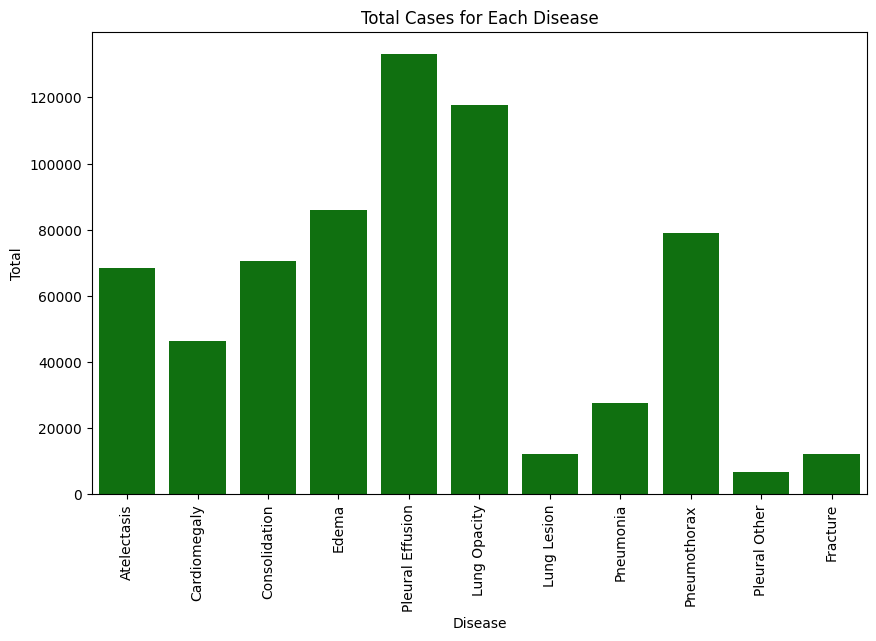

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select disease columns
p = ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Pleural Effusion','Lung Opacity','Lung Lesion','Pneumonia','Pneumothorax','Pleural Other','Fracture']
disease_columns = train_df[p]

# Initialize a list to store counts for each disease
label_counts = []

# Calculate counts of 1s, 0s, and -1s for each disease
for disease in p:
    count_1 = (disease_columns[disease] == 1).sum()
    count_0 = (disease_columns[disease] == 0).sum()
    count_neg1 = (disease_columns[disease] == -1).sum()
    total = count_1 + count_0 + count_neg1

    # Append the counts to the list as a dictionary
    label_counts.append({'Disease': disease, '1s': count_1, '0s': count_0, '-1s': count_neg1, 'Total': total})

# Convert the list of dictionaries to a DataFrame
label_counts_df = pd.DataFrame(label_counts)

# Display the counts
print(label_counts_df)

# Plot the total cases for each disease
plt.figure(figsize=(10, 6))
sns.barplot(x='Disease', y='Total', data=label_counts_df, color="green")
plt.xticks(rotation=90)
plt.title('Total Cases for Each Disease')
plt.show()


# **Pre-processing**

**Data cleaning, handling missing values, and feature engineering**

In [20]:
def prepare_dataset(dataframe,policy,class_names):
    dataset_df = dataframe[dataframe['Frontal/Lateral'] == 'Frontal'] #take frontal pics only
    df = dataset_df.sample(frac=1., random_state=1)
    df.fillna(0, inplace=True) #fill the with zeros
    x_path, y_df = df["full_path"].to_numpy(), df[class_names]
    class_ones = ['Atelectasis', 'Cardiomegaly']
    y = np.empty(y_df.shape, dtype=int)
    for i, (index, row) in enumerate(y_df.iterrows()):
        labels = []
        for cls in class_names:
            curr_val = row[cls]
            feat_val = 0
            if curr_val:
                curr_val = float(curr_val)
                if curr_val == 1:
                    feat_val = 1
                elif curr_val == -1:
                    if policy == "ones":
                        feat_val = 1
                    elif policy == "zeroes":
                        feat_val = 0
                    elif policy == "mixed":
                        if cls in class_ones:
                            feat_val = 1
                        else:
                            feat_val = 0
                    else:
                        feat_val = 0
                else:
                    feat_val = 0
            else:
                feat_val = 0

            labels.append(feat_val)

        y[i] = labels

    return x_path,y

In [21]:
class_names = ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Pleural Effusion']
policy = ['ones','zeroes','mixed']
x_path,labels = prepare_dataset(train_df,policy[-1],class_names)

In [22]:
x_path.shape

(191027,)

# DOWNSAMPLING

In [23]:
import pandas as pd

# Example DataFrames (replace with your actual data)
train_df = pd.DataFrame({'path': x_path})
df2 = pd.DataFrame(labels, columns=class_names)

# Add labels to train_df
train_df[class_names] = df2

# Initialize a list to store the selected rows
selected_rows = []

for cls in class_names:
    # Separate rows where the label is 1 and 0
    positive = train_df[train_df[cls] == 1]


    positive_selected = positive.sample(n=2000, random_state=1)

    # Combine the selected positive and negative rows
    selected_class_rows = pd.concat([positive_selected])

    # Shuffle the combined rows to ensure randomness
    selected_class_rows = selected_class_rows.sample(frac=1, random_state=1).reset_index(drop=True)

    # Append the selected rows to the final list
    selected_rows.append(selected_class_rows)

# Combine all the selected rows across all classes
final_train_df = pd.concat(selected_rows, ignore_index=True)


assert final_train_df.shape[0] == 2000 * len(class_names)

# Check the distribution of labels for each class
print(final_train_df[class_names].sum())


Atelectasis         4573
Cardiomegaly        3328
Consolidation       2523
Edema               4509
Pleural Effusion    5848
dtype: int64


In [28]:
train_df = final_train_df

In [ ]:
final_train_df

,path,Atelectasis,Cardiomegaly,Consolidation,Edema,Pleural Effusion
0,/root/.cache/kagglehub/datasets/ashery/chexper...,1,0,0,1,1
1,/root/.cache/kagglehub/datasets/ashery/chexper...,1,0,0,0,1
2,/root/.cache/kagglehub/datasets/ashery/chexper...,1,0,0,0,1
3,/root/.cache/kagglehub/datasets/ashery/chexper...,1,0,0,0,1
4,/root/.cache/kagglehub/datasets/ashery/chexper...,1,1,0,1,1
...,...,...,...,...,...,...
9995,/root/.cache/kagglehub/datasets/ashery/chexper...,1,0,0,0,1
9996,/root/.cache/kagglehub/datasets/ashery/chexper...,1,0,0,0,1
9997,/root/.cache/kagglehub/datasets/ashery/chexper...,0,0,0,0,1
9998,/root/.cache/kagglehub/datasets/ashery/chexper...,0,0,0,0,1


In [29]:
train_df.shape

(10000, 6)

Pleural Effusion    5848
Atelectasis         4573
Edema               4509
Cardiomegaly        3328
Consolidation       2523
dtype: int64


(<Axes: xlabel='None', ylabel='0'>,
 ([0, 1, 2, 3, 4],
  [Text(0, 0, 'Pleural Effusion'),
   Text(1, 0, 'Atelectasis'),
   Text(2, 0, 'Edema'),
   Text(3, 0, 'Cardiomegaly'),
   Text(4, 0, 'Consolidation')]))

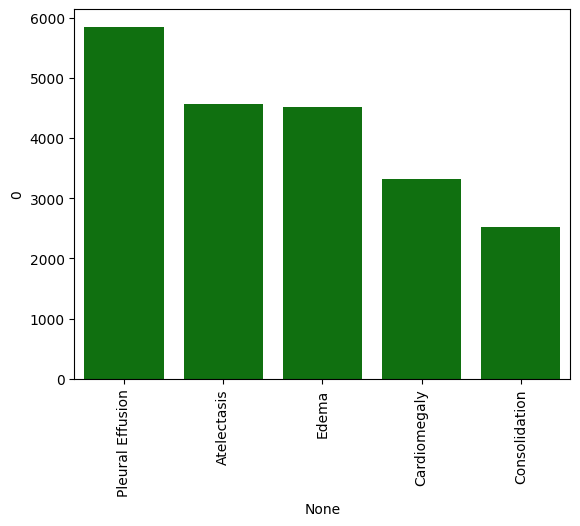

In [30]:
clean_labels = train_df[class_names].sum().sort_values(ascending= False) # get sorted value_count for clean labels
print(clean_labels) # view tabular results

# plot cases using seaborn barchart
clean_labels_df = clean_labels.to_frame() # convert to dataframe for plotting purposes
sns.barplot(x = clean_labels_df.index[::], y= 0, data = clean_labels_df[::], color = "green"), plt.xticks(rotation = 90) # visualize results graphically

In [31]:
valid_x_path,valid_labels = prepare_dataset(test_df,policy[-1],class_names)

In [32]:
test_df = pd.DataFrame({'path':valid_x_path})
df2_valid = pd.DataFrame(valid_labels,columns=class_names)
test_df[list(df2.columns)]=df2_valid

# MODEL

In [33]:
IMG_SIZE = (224,224)
CHANNELS = 3

In [34]:
import tensorflow as tf

In [35]:
test_df['path'][0]

'/root/.cache/kagglehub/datasets/ashery/chexpert/versions/1/valid/patient64735/study1/view1_frontal.jpg'

In [36]:
base_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                           shear_range=0.2,
                                                           zoom_range=0.2,
                                                           rotation_range=20,
                                                           width_shift_range=0.2,
                                                           height_shift_range=0.2,
                                                           horizontal_flip=True)

train_gen = base_gen.flow_from_dataframe(dataframe=train_df,
                                         directory=None,
                                         x_col='path',
                                         y_col=class_names,
                                         class_mode='raw',
                                         target_size=IMG_SIZE,
                                         shuffle=True,
                                         # color_mode = 'grayscale',
                                         batch_size=16)



Found 10000 validated image filenames.


In [37]:
valid_gen = base_gen.flow_from_dataframe(dataframe=test_df,
                                         directory=None,
                                         x_col='path',
                                         y_col=class_names,
                                         class_mode='raw',
                                         target_size=IMG_SIZE,
                                         shuffle = True,
                                         # color_mode = 'grayscale',
                                         batch_size=16)  # we can use much larger batches for evaluation


test_X, test_Y = next(base_gen.flow_from_dataframe(dataframe=test_df,
                                                   directory=None,
                                                   x_col='path',
                                                   y_col=class_names,
                                                   class_mode='raw',
                                                   target_size=IMG_SIZE,
                                                   shuffle = True,
                                                   # color_mode = 'grayscale',
                                                   batch_size=16))

Found 202 validated image filenames.
Found 202 validated image filenames.


In [38]:
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_model.layers:
    layer.trainable = False
x = base_model.output
x = GlobalAveragePooling2D()(x)
predictions = Dense(len(class_names), activation='sigmoid')(x)
model = tf.keras.models.Model(inputs=base_model.input, outputs=predictions)
#model.summary()

29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [76]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Precision, Recall

In [77]:
model.compile(optimizer=Adam(),
              loss='binary_crossentropy',  # Binary crossentropy for multi-label classification
              metrics=['accuracy',Precision(), Recall()])

In [49]:
model = load_model('your_model.h5')

In [ ]:
model.fit(train_gen, epochs=1, validation_data=valid_gen)


625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.1899 - loss: 0.6193 - precision: 0.6144 - recall: 0.4745

In [50]:
test_X2, test_Y2 = next(base_gen.flow_from_dataframe(dataframe=test_df,
                                                   directory=None,
                                                   x_col='path',
                                                   y_col=class_names,
                                                   class_mode='raw',
                                                   target_size=IMG_SIZE,
                                                   shuffle=False,
                                                   batch_size=202))


Found 202 validated image filenames.


In [ ]:
import os
os.chdir('/content/drive/MyDrive')

In [ ]:
model.save('mymodel.h5')

In [ ]:
import tensorflow as tf

# Load the model in SavedModel format
model1 = tf.keras.models.load_model("mymodel.h5")

# EVALUATION METRICCS

In [51]:
test_X[0].shape

(224, 224, 3)

In [52]:
test_X.shape


(16, 224, 224, 3)

In [53]:
predictions = model.predict(test_X2)

7/7 ━━━━━━━━━━━━━━━━━━━━ 50s 6s/step


In [54]:
predictions

array([[0.3785779 , 0.22959457, 0.21137296, 0.2646138 , 0.6536967 ],
       [0.5264069 , 0.40940017, 0.19287406, 0.15951905, 0.7648054 ],
       [0.53638244, 0.48188877, 0.12254067, 0.38063613, 0.3693198 ],
       ...,
       [0.52891093, 0.3521796 , 0.22708774, 0.44209096, 0.596688  ],
       [0.4734688 , 0.27156466, 0.24895643, 0.29070675, 0.51448786],
       [0.559371  , 0.2694331 , 0.26355132, 0.17158212, 0.45879498]],
      dtype=float32)

In [56]:
predictions.shape

(202, 5)

In [64]:
binary_predictions = (predictions >= 0.5).astype(int)

In [57]:
binary_predictions

array([[0, 0, 0, 0, 1],
       [1, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       ...,
       [1, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0]])

In [58]:
true_labels = test_df[class_names].values

In [59]:
true_labels

array([[1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 1, 0, 1, 0],
       ...,
       [0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1]])

In [65]:

accuracies = (binary_predictions == true_labels).mean(axis=0)


In [66]:
accuracies

array([0.61386139, 0.64356436, 0.84158416, 0.80693069, 0.71287129])

In [67]:
accuracy_class_pairs = list(zip(accuracies, class_names))

# Sort by accuracy in descending order
sorted_pairs = sorted(accuracy_class_pairs, key=lambda x: x[0], reverse=True)

# Print the sorted accuracies and class names
for accuracy, class_name in sorted_pairs:
    print(f"{class_name}: {accuracy:.2f}")

Consolidation: 0.84
Edema: 0.81
Pleural Effusion: 0.71
Cardiomegaly: 0.64
Atelectasis: 0.61


In [68]:
# Overall accuracy across all samples and classes
total_accuracy = (binary_predictions == true_labels).mean()

print("Total Accuracy:", total_accuracy)


Total Accuracy: 0.7237623762376237


In [ ]:
# predictions = model.predict(test_X2[0])

In [69]:
test_X2[0].shape

(224, 224, 3)

In [72]:

from PIL import Image

def validate(path):
    # Step 1: Read the image
    image = Image.open(path)

    # Step 2: Create DataFrame with 5 columns (assuming binary classes)
    test_df = pd.DataFrame({
        'path': [path],
        'Atelectasis': [0],   # replace these values based on your use case
        'Cardiomegaly': [1],
        'Consolidation': [0],
        'Edema': [1],
        'Pleural Effusion': [0]
    })

    # Step 3: Define class names and target size
    class_names =  ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Pleural Effusion']
    IMG_SIZE = (224, 224)  # Adjust to your image size

    # Step 4: Set up ImageDataGenerator and create batches
    base_gen = ImageDataGenerator(rescale=1./255)
    test_X, test_Y = next(base_gen.flow_from_dataframe(
        dataframe=test_df,
        directory=None,  # set to None if paths are absolute
        x_col='path',
        y_col=class_names,
        class_mode='raw',
        target_size=IMG_SIZE,
        shuffle=True,
        batch_size=1
    ))
    predictions = model.predict(test_X)
    binary_predictions = (predictions >= 0.5).astype(int)
    return binary_predictions






In [73]:
accu = validate('/root/.cache/kagglehub/datasets/ashery/chexpert/versions/1/valid/patient64735/study1/view1_frontal.jpg')
accu

Found 1 validated image filenames.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step


array([[1, 0, 0, 0, 1]])

In [74]:
from PIL import Image

# Load the image from a path
image_path = "/root/.cache/kagglehub/datasets/ashery/chexpert/versions/1/valid/patient64735/study1/view1_frontal.jpg"
image = Image.open(image_path)

# Save the image to a new location
new_image_path = "image.jpg"
image.save(new_image_path)

*val_loss, val_accuracy, val_precision, val_recall*

In [78]:
val_loss, val_accuracy, val_precision, val_recall = model.evaluate(valid_gen)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")
print(f"Validation Precision: {val_precision}")
print(f"Validation Recall: {val_recall}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 55s 4s/step - accuracy: 0.2096 - loss: 0.5738 - precision: 0.3999 - recall: 0.3923
Validation Loss: 0.5710734128952026
Validation Accuracy: 0.23762376606464386
Validation Precision: 0.45075756311416626
Validation Recall: 0.4265232980251312


# F1SCORE

In [80]:
# Calculate F1-score
val_f1_score = 2 * (val_precision * val_recall) / (val_precision + val_recall)
print(f"Validation F1-Score: {val_f1_score}")

# Generate predictions and create a confusion matrix
y_pred = (model.predict(valid_gen) > 0.5).astype(int)
y_true = valid_gen.labels  # assuming `valid_gen` has the true labels

# Compute confusion matrix and classification report
conf_matrix = confusion_matrix(y_true.argmax(axis=1), y_pred.argmax(axis=1))
print("Confusion Matrix:\n", conf_matrix)

class_report = classification_report(y_true.argmax(axis=1), y_pred.argmax(axis=1), target_names=class_names)
print("Classification Report:\n", class_report)

Validation F1-Score: 0.4383057033286812
13/13 ━━━━━━━━━━━━━━━━━━━━ 50s 4s/step
Confusion Matrix:
 [[91 17  0 13 28]
 [18  3  0  3  8]
 [ 3  1  0  0  0]
 [ 6  2  0  1  0]
 [ 5  1  0  1  1]]
Classification Report:
                   precision    recall  f1-score   support

     Atelectasis       0.74      0.61      0.67       149
    Cardiomegaly       0.12      0.09      0.11        32
   Consolidation       0.00      0.00      0.00         4
           Edema       0.06      0.11      0.07         9
Pleural Effusion       0.03      0.12      0.04         8

        accuracy                           0.48       202
       macro avg       0.19      0.19      0.18       202
    weighted avg       0.57      0.48      0.52       202



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


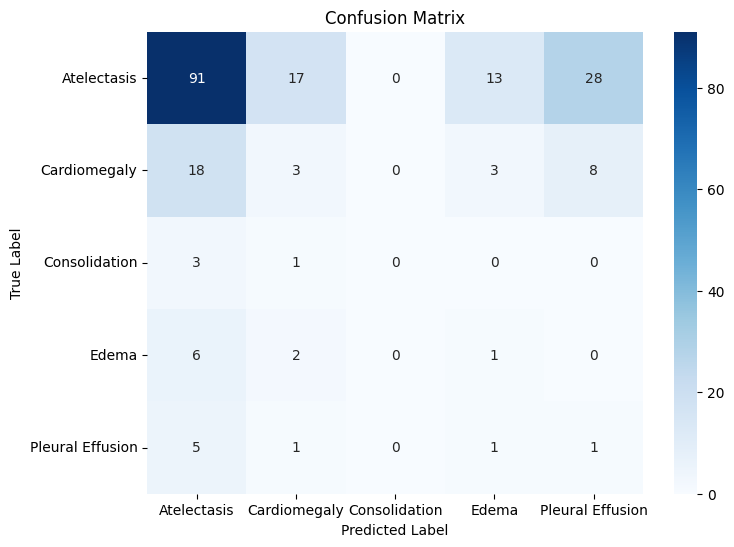

In [84]:
conf_matrix = confusion_matrix(y_true.argmax(axis=1), y_pred.argmax(axis=1))


# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

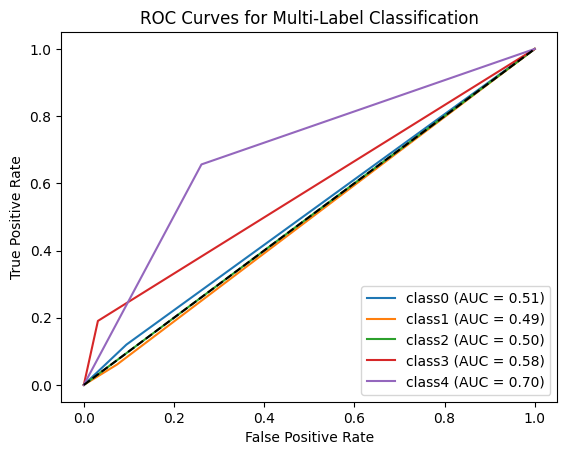

Consolidation: 0.84
Edema: 0.81
Pleural Effusion: 0.71
Cardiomegaly: 0.64
Atelectasis: 0.61


In [93]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt


# Loop through each class to plot its ROC curve
for i in range(y_true.shape[1]):
    fpr, tpr, _ = roc_curve(true_labels[:,i],binary_predictions[:,i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'class{i} (AUC = {roc_auc:.2f})')

# Plot formatting
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for reference
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Multi-Label Classification')
plt.legend(loc='lower right')
plt.show()

# Sort by accuracy (AUC) in descending order
sorted_pairs = sorted(accuracy_class_pairs, key=lambda x: x[0], reverse=True)

# Print the sorted accuracies and class names
for accuracy, class_name in sorted_pairs:
    print(f"{class_name}: {accuracy:.2f}")

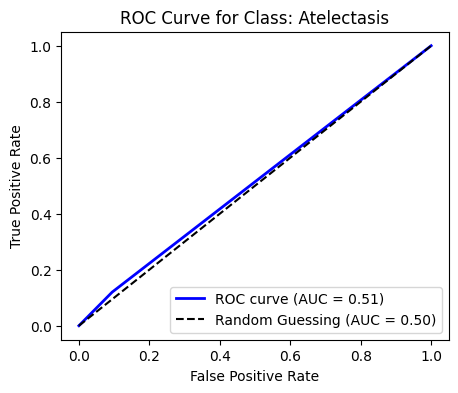

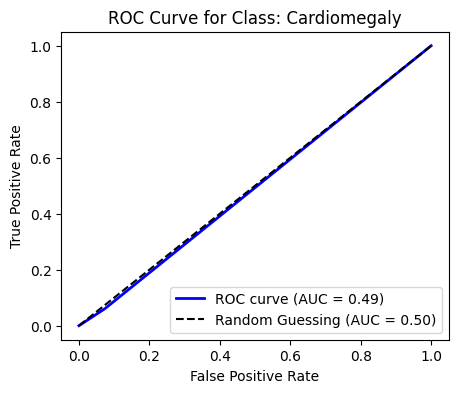

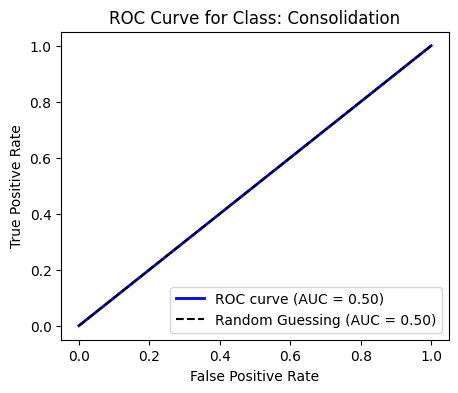

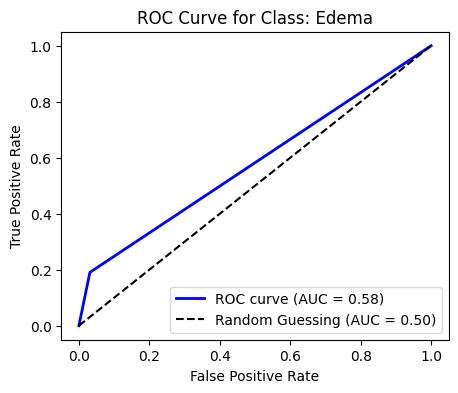

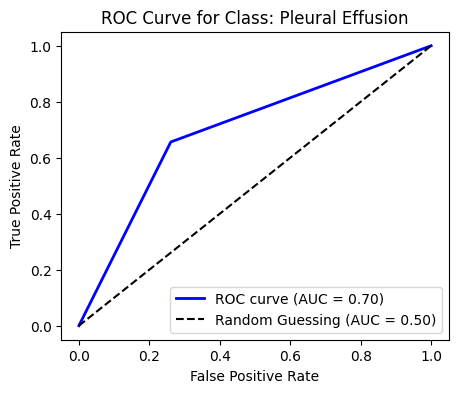

In [97]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming `true_labels` and `binary_predictions` are your true and predicted labels,
# and `class_names` is a list or array containing the names of each class.

# Loop through each class and create an individual ROC plot
for i in range(true_labels.shape[1]):
    fpr, tpr, _ = roc_curve(true_labels[:, i], binary_predictions[:, i])
    roc_auc = auc(fpr, tpr)

    # Create a new plot for each class
    plt.figure(figsize=(5,4))
    plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})', linewidth=2)

    # Diagonal reference line for random guessing
    plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing (AUC = 0.50)')

    # Formatting the plot
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for Class: {class_names[i]}')
    plt.legend(loc='lower right')

    # Display the plot for each class
    plt.show()
